# 异常数据的检测与处理
## 1.基于箱线图识别异常

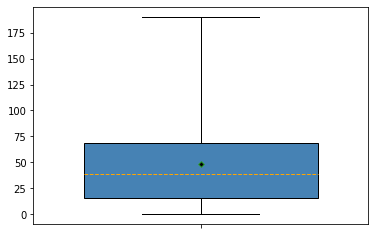

In [3]:
# 绘制太阳黑子数据的箱线图
# 导入第三方模块
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据
sunspots = pd.read_csv(r'sunspots.csv')
# 绘制箱线图（1.5倍的四分位差）
plt.boxplot(x = sunspots.counts, # 指定绘制箱线图的数据
            whis = 3, # 指定1.5倍的四分位差
            widths = 0.7, # 指定箱线图的宽度为0.8
            patch_artist = True, # 指定需要填充箱体颜色
            showmeans = True, # 指定需要显示均值
            boxprops = {'facecolor':'steelblue'}, # 指定箱体的填充色为铁蓝色
            flierprops = {'markerfacecolor':'red', 'markeredgecolor':'red', 'markersize':4}, # 指定异常点的填充色、边框色和大小
            meanprops = {'marker':'D','markerfacecolor':'black', 'markersize':4}, # 指定均值点的标记符号（菱形）、填充色和大小
            medianprops = {'linestyle':'--','color':'orange'}, # 指定中位数的标记符号（虚线）和颜色
            labels = [''] # 去除箱线图的x轴刻度值
           )
# 显示图形
plt.show()

In [4]:
# 计算下四分位数和上四分位
Q1 = sunspots.counts.quantile(q = 0.25)
Q3 = sunspots.counts.quantile(q = 0.75)

# 基于1.5倍的四分位差计算上下须对应的值
low_whisker = Q1 - 1.5*(Q3 - Q1)
up_whisker = Q3 + 1.5*(Q3 - Q1)

# 寻找异常点
sunspots.counts[(sunspots.counts > up_whisker) | (sunspots.counts < low_whisker)]

78     154.4
247    151.6
257    190.2
258    184.8
259    159.0
279    155.4
280    154.7
Name: counts, dtype: float64

## 2.基于正态分布特性识别异常值

In [5]:
# 利用正态分布的特性寻找异常点
# 读入外部数据
pay_ratio = pd.read_excel(r'pay_ratio.xlsx')
# 返回数据的前5行
pay_ratio.head()

,date,login,pay,ratio
0,2019-07-01,2234185,965957,0.432353
1,2019-07-02,1308983,598254,0.457038
2,2019-07-03,1395809,455764,0.326523
3,2019-07-04,1655896,522631,0.315618
4,2019-07-05,1141110,586891,0.514315


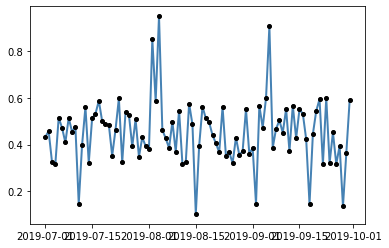

(array([-7.,  0.,  7.]), <a list of 3 Text xticklabel objects>)

ValueError: Cannot convert -7 to a date.  This often happens if non-datetime values are passed to an axis that expects datetime objects.

<Figure size 432x288 with 1 Axes>

In [6]:
# 绘制折线图+散点图
# 绘制单条折线图，并在折线图的基础上添加点图
plt.plot(pay_ratio.date, # x轴数据
         pay_ratio.ratio, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 折线图中添加圆点
         markersize = 4, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='black') # 点的填充色
plt.show()

# 添加上下界的水平参考线
plt.axhline(y = pay_ratio.ratio.mean() - 3* pay_ratio.ratio.std(), linestyle = '--', color = 'gray')
plt.axhline(y = pay_ratio.ratio.mean() + 3* pay_ratio.ratio.std(), linestyle = '--', color = 'gray')

# 导入模块，用于日期刻度的修改（因为默认格式下的日期刻度标签并不是很友好）
import matplotlib as mpl
# 获取图的坐标信息
ax = plt.gca()
# 设置日期的显示格式  
date_format = mpl.dates.DateFormatter("%m-%d")  
ax.xaxis.set_major_formatter(date_format) 

# 设置x轴每个刻度的间隔天数
xlocator = mpl.ticker.MultipleLocator(7)
ax.xaxis.set_major_locator(xlocator)
# 为了避免x轴刻度标签的紧凑，将刻度标签旋转45度
plt.xticks(rotation=45)

In [7]:
# 计算判断异常点和极端异常点的临界值
outlier_ll = pay_ratio.ratio.mean() - 2* pay_ratio.ratio.std()
outlier_ul = pay_ratio.ratio.mean() + 2* pay_ratio.ratio.std()

extreme_outlier_ll = pay_ratio.ratio.mean() - 3* pay_ratio.ratio.std()
extreme_outlier_ul = pay_ratio.ratio.mean() + 3* pay_ratio.ratio.std()

# 寻找异常点
pay_ratio.loc[(pay_ratio.ratio > outlier_ul) | (pay_ratio.ratio < outlier_ll), ['date','ratio']]
# 寻找极端异常点
pay_ratio.loc[(pay_ratio.ratio > extreme_outlier_ul) | (pay_ratio.ratio < extreme_outlier_ll), ['date','ratio']]

,date,ratio
34,2019-08-04,0.948245
67,2019-09-06,0.905321


## 3.异常值的处理办法
### 1.直接从数据集中删除异常点
### 2.使用简单数值（均值或中位数）或者距离异常值最近的最大值（最小值）替换异常值，也可以使用判断异常值的临界值替换异常值
### 3.将异常值当作缺失值处理，使用插补法估计异常值，或者根据异常值衍生出表示是否异常的哑变量